In [1]:
import os
import numpy as np
import torch
from torch import nn
from torch import optim
from torch.utils.data import DataLoader, WeightedRandomSampler

import sys 
sys.path.append('..')

# Reference: https://github.com/alexeybokhovkin/DeepSDF

In [2]:
from models import SingleShapeDecoder
from utils.dataset import SingleShapeSingleGripperData
import utils.dataset
from trainer import SdfTrainer

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

# HACKS!
# MOVE TO CONFIG FILE
DATADIR = '/home/ninad/Desktop/Docs/phd-res/proj-irvl-grasp-transfer/code/docker-data/output_dataset'
OBJ_MODEL = '003_cracker_box_google_16k_textured_scale_1000'
GRIPPER = 'fetch_gripper'
GRASP_IDX = 0

In [4]:
validation_fraction = 0.3
batch_size = 16384
trn_steps = 400
val_steps = 200

In [5]:
trn_data, val_data = utils.dataset.train_val_split(
    utils.dataset.load_from_npz(DATADIR, OBJ_MODEL, GRIPPER, GRASP_IDX),
    val_fraction=validation_fraction)

trn_query, trn_sdf_obj, trn_sdf_grp = utils.dataset.format_data(trn_data)
val_query, val_sdf_obj, val_sdf_grp = utils.dataset.format_data(val_data)

trn_weights = utils.dataset.get_weights_dual(trn_sdf_obj, trn_sdf_grp)
val_weights = utils.dataset.get_weights_dual(val_sdf_obj, val_sdf_grp)

trn_dataset = SingleShapeSingleGripperData(trn_query, trn_sdf_obj, trn_sdf_grp)
val_dataset = SingleShapeSingleGripperData(val_query, val_sdf_obj, val_sdf_grp)

trn_sampler = WeightedRandomSampler(trn_weights, batch_size*trn_steps)
val_sampler = WeightedRandomSampler(val_weights, batch_size*val_steps)

trn_loader = DataLoader(trn_dataset, batch_size=batch_size, sampler=trn_sampler, num_workers=4)

val_loader = DataLoader(val_dataset, batch_size=batch_size, sampler=val_sampler, num_workers=4)

In [6]:
epochs = 50
delta = 0.1
alpha = 0.9
lr = 1e-3
inner_dimension = 512
count_layers = 10
model = SingleShapeDecoder(inner_dim=512, num_layers=count_layers).cuda()
# criterion = nn.MSELoss()
criterion = nn.L1Loss()
optimizer = optim.Adam(model.parameters(), lr=lr)


In [7]:
sdf_trainer = SdfTrainer(model, criterion, optimizer, delta, alpha)
sdf_trainer.fit(trn_loader, val_loader, epochs, save=True)

  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.03226, val mse: 4723.16602
GRIPPER val loss: 0.03226, val mse: 6509.82520


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00324, val mse: 2614.43042
GRIPPER val loss: 0.00324, val mse: 3268.53540


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00217, val mse: 2960.94189
GRIPPER val loss: 0.00217, val mse: 2541.35303


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00276, val mse: 3102.04883
GRIPPER val loss: 0.00276, val mse: 3489.18091


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00252, val mse: 2801.92090
GRIPPER val loss: 0.00252, val mse: 2853.35303


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00230, val mse: 2931.44873
GRIPPER val loss: 0.00230, val mse: 3504.47559


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00260, val mse: 2443.08105
GRIPPER val loss: 0.00260, val mse: 2562.75488


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00205, val mse: 2683.41626
GRIPPER val loss: 0.00205, val mse: 2772.40503


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00244, val mse: 2989.88721
GRIPPER val loss: 0.00244, val mse: 3114.41553


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00220, val mse: 2969.48438
GRIPPER val loss: 0.00220, val mse: 3298.27002


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00217, val mse: 2386.71509
GRIPPER val loss: 0.00217, val mse: 2754.75220


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00213, val mse: 2552.14551
GRIPPER val loss: 0.00213, val mse: 3359.04688


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00192, val mse: 2589.59863
GRIPPER val loss: 0.00192, val mse: 2486.83667


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00232, val mse: 2499.01416
GRIPPER val loss: 0.00232, val mse: 3344.33667


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00209, val mse: 2985.75562
GRIPPER val loss: 0.00209, val mse: 2520.86646


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00225, val mse: 2627.45801
GRIPPER val loss: 0.00225, val mse: 2656.12842


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00247, val mse: 2582.39624
GRIPPER val loss: 0.00247, val mse: 3110.56494


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00199, val mse: 2989.30762
GRIPPER val loss: 0.00199, val mse: 2635.90967


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00218, val mse: 3297.59180
GRIPPER val loss: 0.00218, val mse: 2613.81006


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00212, val mse: 2807.41821
GRIPPER val loss: 0.00212, val mse: 3093.36060


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00213, val mse: 2336.50928
GRIPPER val loss: 0.00213, val mse: 2576.54395


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00222, val mse: 3206.59570
GRIPPER val loss: 0.00222, val mse: 2741.96118


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00214, val mse: 2954.58447
GRIPPER val loss: 0.00214, val mse: 3381.43945


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00208, val mse: 2683.59570
GRIPPER val loss: 0.00208, val mse: 3379.71851


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00228, val mse: 2425.17114
GRIPPER val loss: 0.00228, val mse: 2790.10938


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00203, val mse: 2571.25098
GRIPPER val loss: 0.00203, val mse: 3340.41699


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00220, val mse: 2945.15308
GRIPPER val loss: 0.00220, val mse: 3760.16626


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00212, val mse: 2930.55811
GRIPPER val loss: 0.00212, val mse: 3318.90381


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00205, val mse: 2805.49707
GRIPPER val loss: 0.00205, val mse: 2930.72461


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00186, val mse: 2993.53931
GRIPPER val loss: 0.00186, val mse: 3070.62061


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00210, val mse: 2151.62061
GRIPPER val loss: 0.00210, val mse: 2639.60571


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00241, val mse: 2728.20728
GRIPPER val loss: 0.00241, val mse: 2796.43164


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00206, val mse: 3052.39941
GRIPPER val loss: 0.00206, val mse: 2999.29761


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00207, val mse: 3434.38940
GRIPPER val loss: 0.00207, val mse: 3251.56934


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00210, val mse: 2723.33179
GRIPPER val loss: 0.00210, val mse: 2784.86157


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00222, val mse: 2896.77271
GRIPPER val loss: 0.00222, val mse: 3733.23999


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00207, val mse: 2906.52441
GRIPPER val loss: 0.00207, val mse: 4185.35938


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00214, val mse: 3409.80811
GRIPPER val loss: 0.00214, val mse: 2992.51318


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00229, val mse: 3116.47241
GRIPPER val loss: 0.00229, val mse: 3208.35083


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00222, val mse: 2556.05103
GRIPPER val loss: 0.00222, val mse: 3558.09155


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00222, val mse: 3391.71240
GRIPPER val loss: 0.00222, val mse: 3031.40869


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00202, val mse: 3288.24878
GRIPPER val loss: 0.00202, val mse: 3099.76929


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00206, val mse: 2496.20898
GRIPPER val loss: 0.00206, val mse: 3423.56714


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00209, val mse: 2961.26318
GRIPPER val loss: 0.00209, val mse: 2812.84082


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00211, val mse: 2861.66431
GRIPPER val loss: 0.00211, val mse: 3837.60645


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00216, val mse: 3647.93872
GRIPPER val loss: 0.00216, val mse: 3176.42993


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00211, val mse: 2797.11279
GRIPPER val loss: 0.00211, val mse: 3017.55322


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00210, val mse: 2719.89819
GRIPPER val loss: 0.00210, val mse: 2620.83887


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00222, val mse: 3263.42432
GRIPPER val loss: 0.00222, val mse: 3466.25488


  0%|          | 0/400 [00:00<?, ?it/s]

OBJECT val loss: 0.00208, val mse: 2479.04126
GRIPPER val loss: 0.00208, val mse: 3215.17261


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def plot_sdf(xyz, sdf, title='Sample_Title', n_display=10000):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')    

    ind = np.random.choice(range(xyz.shape[0]), n_display)
    data = xyz[ind].T

    ax.scatter(data[0], data[2], data[1], s=5, c=sdf[ind])
    ax.view_init(20, 100)
    limit = (-0.95, 0.95)
    ax.set_xlim3d(*limit)
    ax.set_ylim3d(*limit)
    ax.set_zlim3d(*limit)
    plt.title(title)
    plt.show()

In [9]:
x, y, z = next(iter(val_loader))
print(x.shape)
# x, y, z = next(iter(trn_loader))
# print(x.shape)

torch.Size([16384, 3])


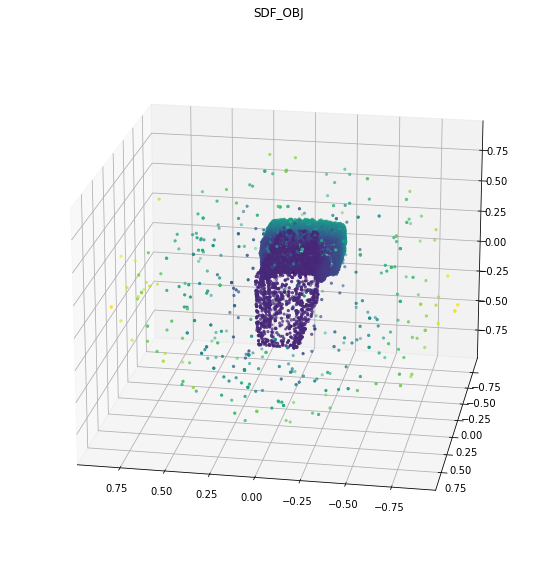

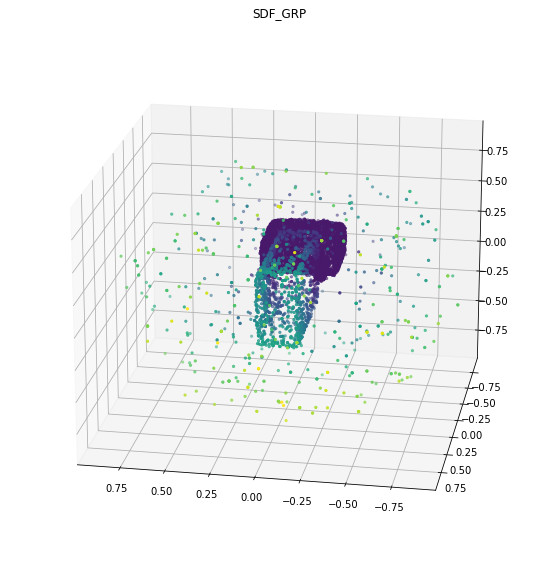

In [10]:
plot_sdf(x.numpy(), y.numpy().squeeze(), title='SDF_OBJ', n_display=10000)
plot_sdf(x.numpy(), z.numpy().squeeze(), title='SDF_GRP', n_display=10000)

In [11]:
predictions = model(x.float().cuda()) # model predictions
predictions = predictions.detach().cpu().numpy()

pred_obj = predictions[:, 0].squeeze()
pred_grp = predictions[:, 1].squeeze()
print(pred_obj.shape)
print(pred_grp.shape)

x = x.numpy()
y = y.squeeze().numpy()
z = z.squeeze().numpy()

(16384,)
(16384,)


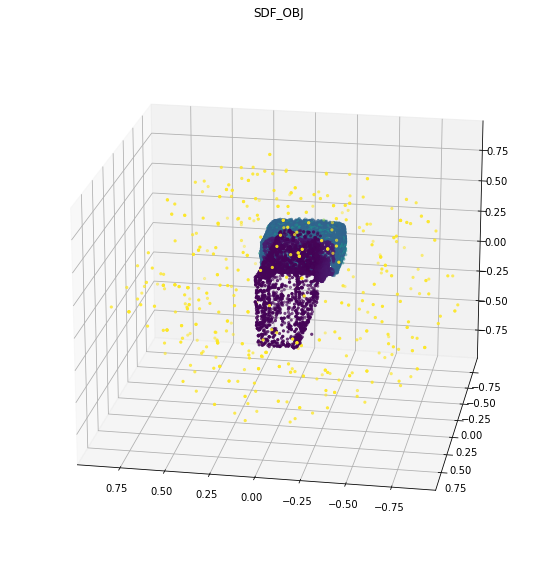

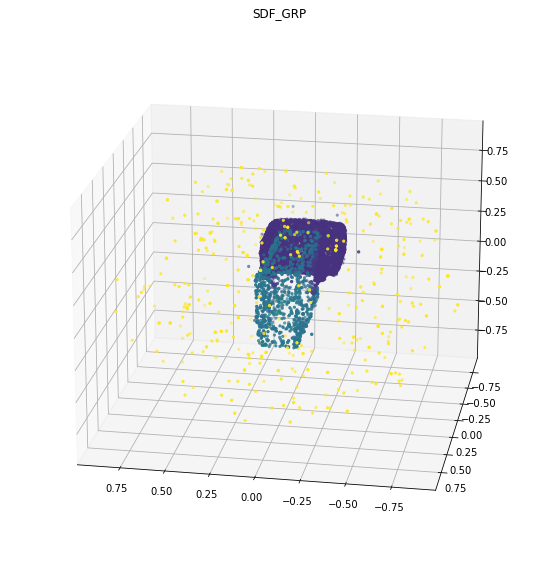

In [12]:
plot_sdf(x, pred_obj, title='SDF_OBJ', n_display=10000)
plot_sdf(x, pred_grp, title='SDF_GRP', n_display=10000)

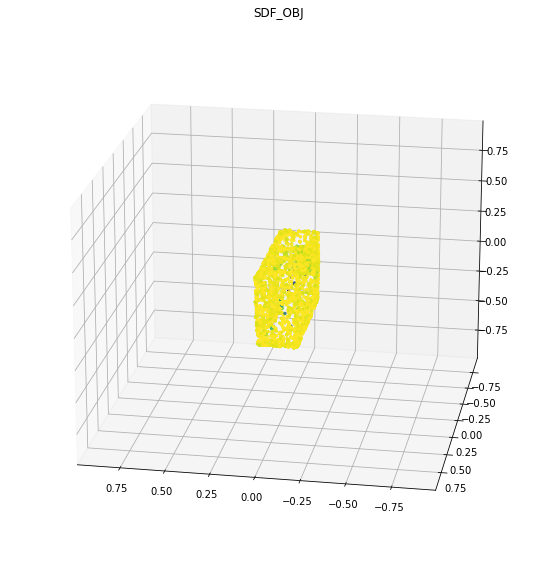

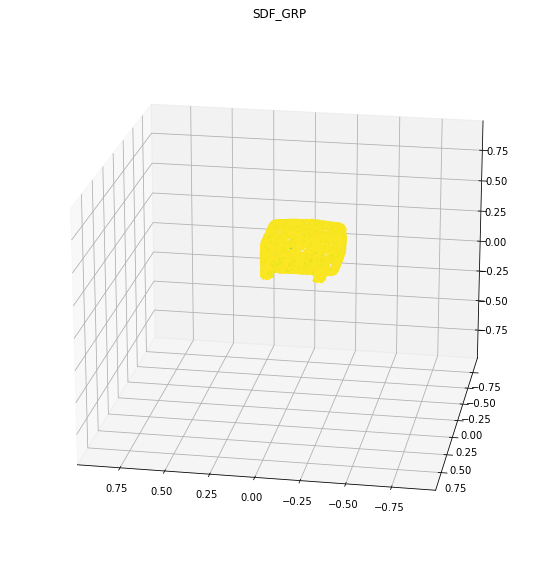

In [13]:
EPS = 1e-4

# ind_obj =  np.where((y >= -EPS) & (y <= EPS))
ind_obj = y <= -EPS
plot_sdf(x[ind_obj, :], y[ind_obj], title='SDF_OBJ', n_display=10000)

# print(ind_obj)
ind_grp = z <= -EPS
# ind_grp = np.where((z >= -EPS) & (z <= EPS)) # z <= -1e-4
plot_sdf(x[ind_grp, :], z[ind_grp], title='SDF_GRP', n_display=10000)

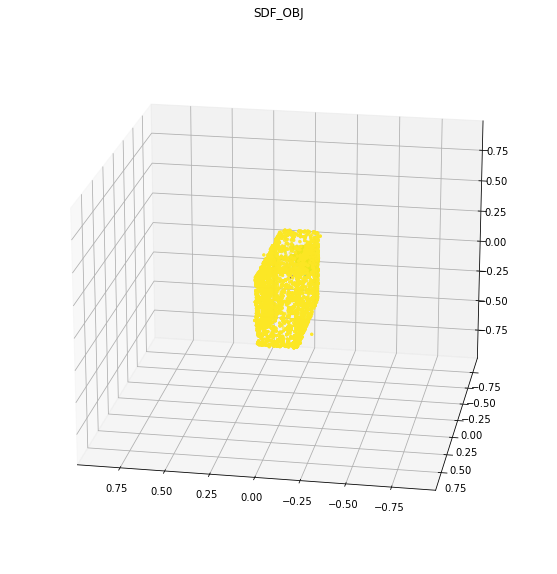

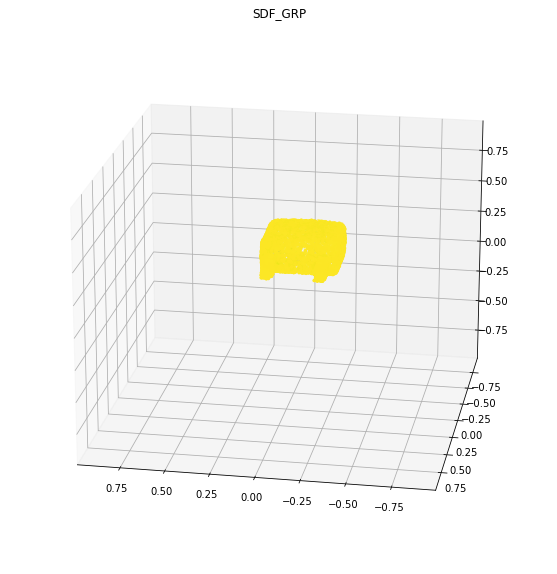

In [14]:
ind_obj = pred_obj.squeeze() <= 0
plot_sdf(x[ind_obj, :], pred_obj[ind_obj], title='SDF_OBJ', n_display=10000)


ind_grp = pred_grp.squeeze() <= -1e-4
plot_sdf(x[ind_grp, :], pred_grp[ind_grp], title='SDF_GRP', n_display=10000)

In [15]:
z = z.squeeze()
# torch.max(z-pred_grp)

In [16]:
import pyrender
# Just pass the points you want to visualize
def plt_plots_3d(pts):
    colors = np.zeros(pts.shape)
    cloud = pyrender.Mesh.from_points(pts, colors=colors)
    scene = pyrender.Scene()
    scene.add(cloud)
    viewer = pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)

# Pass the point as well as the sdf to see inside/outside points
def plt_points_sdf(pts, sdf):
    colors = np.zeros(pts.shape)
    colors[sdf < 0, 1] = 1
    colors[sdf > 0, 0] = 1
    cloud = pyrender.Mesh.from_points(pts, colors=colors)
    scene = pyrender.Scene()
    scene.add(cloud)
    viewer = pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)

def plt_points_sdf_compare(pts, sdf_gt, sdf_pred):
    colors = np.zeros(pts.shape)
    colors[sdf_gt < 0, 1] = 1
    colors[sdf_gt > 0, 0] = 1
    cloud = pyrender.Mesh.from_points(pts, colors=colors)
    scene = pyrender.Scene()
    scene.add(cloud)
    viewer = pyrender.Viewer(scene, use_raymond_lighting=True, point_size=2)
    
    colors2 = np.zeros(pts.shape)
    colors2[sdf_pred < 0, 1] = 1
    colors2[sdf_pred > 0, 0] = 1
    cloud2 = pyrender.Mesh.from_points(pts, colors=colors2)
    scene2 = pyrender.Scene()
    scene2.add(cloud2)
    viewer = pyrender.Viewer(scene2, use_raymond_lighting=True, point_size=2)



In [17]:
# plt_points_sdf(x.numpy(), y.squeeze())
# plt_points_sdf(x.numpy(), pred_obj)
plt_points_sdf_compare(x, y, pred_obj)


In [18]:
plt_points_sdf_compare(x, z, pred_grp)
